In [1]:
import os

# Check if the environment is activated
if "CONDA_DEFAULT_ENV" in os.environ:
    print(f"Environment '{os.environ['CONDA_DEFAULT_ENV']}' is activated.")
else:
    print("No specific environment is activated.")

Environment 'research' is activated.


In [2]:
import numpy as np
import pandas as pd
from IPython.display import display

np.random.seed(42)

In [3]:
# Load the Boston dataset
dataset = "boston"
raw_df = pd.read_csv("data/boston.csv")
target = ["MEDV"]
features = raw_df.columns.drop(target)
target, features

(['MEDV'],
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'))

In [4]:
# # Load the store sales dataset
# dataset = "store_sales"
# excel_file = pd.ExcelFile("data/store_sales.xlsx")
# sheet_names = excel_file.sheet_names

# # Read the data
# raw_df = pd.read_excel(excel_file, sheet_name=sheet_names[2])  # 2, 9
# iri_key_counts = raw_df["IRI_KEY"].value_counts()
# iri_keys = iri_key_counts[iri_key_counts > 300].index


# target = ["Total.Volume"]
# features = ["F", "D", "Unit.Price"]

# raw_df = raw_df[raw_df["IRI_KEY"] == iri_keys[0]]

# sheet_names, iri_keys

In [5]:
# # Load the California housing dataset
# from sklearn.datasets import fetch_california_housing

# dataset = "california"
# housing = fetch_california_housing()
# target = housing.target_names
# features = housing.feature_names
# raw_df = pd.concat(
#     [
#         pd.DataFrame(housing.data, columns=housing.feature_names),
#         pd.DataFrame(housing.target, columns=housing.target_names),
#     ],
#     axis=1,
# )
# target, features

In [6]:
# # Load the soybean dataset
# dataset = "soybean"
# raw_df = pd.read_excel("data/soybean.xlsx")
# # X = raw_df.values[:-1, [5, 6, 15, 16, 17, 26,
# #                         34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]  # 9 check yield 12 rm band
# # y = raw_df.values[:-1, 11]
# X = raw_df.iloc[:-1, [5, 6, 15, 16, 17, 26,
#                   34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]
# y = raw_df.iloc[:-1, [11]]
# X.shape, y.shape

In [7]:
# # Load LengthOfStay
# dataset = "LengthOfStay"
# raw_df = pd.read_csv("data/LengthOfStay.csv")
# raw_df = raw_df.drop(columns=["eid", "vdate", "discharged"])
# target = ["lengthofstay"]
# features = raw_df.columns.drop(target)
# target, features

In [8]:
# # Load HospitalStay
# dataset = "HospitalStay"
# raw_df = pd.read_csv("data/Healthcare_Investments_and_Hospital_Stay.csv")
# target = ["Hospital_Stay"]
# features = raw_df.columns.drop(target)
# target, features

In [9]:
X = raw_df[features]
y = raw_df[target]

display(f"Dataset: {dataset}", X.describe(), y.describe())

'Dataset: boston'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [10]:
# # Remove Outliers
# def remove_outliers(df, threshold=3):
#     z_scores = np.abs((df - df.mean()) / df.std())
#     return df[(z_scores < threshold).all(axis=1)]
# filtered_train_data = train_data
# for col in train_data.columns:
#     value_counts = train_data[col].value_counts().sort(by="count")
#     valid = value_counts.filter(pl.col("count") > value_counts["count"].max()/len(value_counts))[col]
#     filtered_train_data = filtered_train_data.filter(pl.col(col).is_in(valid))
# display(filtered_train_data, filtered_train_data.describe())

In [11]:
# Plot data
import matplotlib.pyplot as plt
import seaborn as sns


def plot_data(X, y, cols=4):
    fig, axs = plt.subplots(
        (X.shape[1]+X.shape[1]*y.shape[1] + y.shape[1]+cols-1)//cols, cols, figsize=(20, 15))
    axs = axs.flatten()

    a = 0
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.tick_params(axis="both", which="major")
        ax.tick_params(axis="both", which="minor")
    a += i + 1
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        for j, ycol in enumerate(y.columns):
            ax = axs[a+i+j*y.shape[1]]
            sns.scatterplot(x=data, y=y[ycol], ax=ax)
            ax.set_title(f"{col} vs {ycol}")
            ax.set_xlabel(col)
            ax.set_ylabel(ycol)
    a += i + 1
    for i, col in enumerate(y.columns):
        data = y[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
    a += i+1
    for j in range(a, len(axs)):
        fig.delaxes(axs[j])

    fig.tight_layout()
    plt.show()
    
# plot_data(X, y)

In [12]:
# Define search
from optuna.integration.sklearn import OptunaSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    TargetEncoder,
)

CATEGORICAL_PREPROCESSORS = {
    "drop": "drop",
    "ordinal": OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
    "one_hot": OneHotEncoder(
        handle_unknown="ignore", max_categories=20, sparse_output=False
    ),
    "target": TargetEncoder(target_type="continuous"),
}

SCALERS = {
    "identity": None,
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "quantile": QuantileTransformer(),
}

search_params = {
    "cv": 3,
    "n_jobs": -1,  # -1,
    "n_trials": 1,
    # "n_trials": None,
    "random_state": 42,
    "return_train_score": True,
    "scoring": "neg_root_mean_squared_error",  # r2
    "timeout": 10,
    # "timeout": None,
    "verbose": 1,
}


def search(
    model,
    param_grid={},
    categorical_preprocessor="drop",
    scaler="identity",
    search_params=search_params,
):
    search_params = search_params.copy()
    # search_params["n_trials"] = int(4**len(param_grid))

    numerical_features = X.select_dtypes(include=["number"]).columns
    categorical_features = X.select_dtypes(include=["object", "category"]).columns
    preprocessor = ColumnTransformer(
        [
            ("numerical", "passthrough", numerical_features),
            (
                "categorical",
                CATEGORICAL_PREPROCESSORS[categorical_preprocessor],
                categorical_features,
            ),
        ]
    )

    return OptunaSearchCV(
        Pipeline(
            [
                ("categorical_preprocessor", preprocessor),
                ("scaler", SCALERS[scaler]),
                ("model", model),
            ]
        ),
        {f"model__{k}": v for k, v in param_grid.items()},
        **search_params,
    )

In [13]:
# Define search grids
from optuna.distributions import (
    CategoricalDistribution,
    FloatDistribution,
    IntDistribution,
)

mlp_sk_param_grid = {
    "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
    "max_iter": IntDistribution(400, 400, log=True),
    # "early_stopping": CategoricalDistribution([True]),
}

fonn1_sk_param_grid = {
    "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
    "max_iter": IntDistribution(400, 400, log=True),
}

fonn2_sk_param_grid = {
    "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
    "max_iter": IntDistribution(400, 400, log=True),
}

mlp_old_param_grid = {
    "learning_rate_init": FloatDistribution(1e-3, 1e-3, log=True),
    "max_iter": IntDistribution(1000, 1000, log=True),
}

fonn1_old_param_grid = {
    "learning_rate_init": FloatDistribution(5e-3, 5e-3, log=True),
    "max_iter": IntDistribution(2000, 2000, log=True),
}

fonn2_old_param_grid = {
    "learning_rate_init": FloatDistribution(1e-3, 1e-3, log=True),
    "max_iter": IntDistribution(1000, 1000, log=True),
}

In [14]:
from models import MLP, FONN1, FONN2, TREENN1, TREENN2
from models_sklearn import (
    Tree,
    Ensemble,
    MLP as MLP_sk,
    FONN1 as FONN1_sk,
    FONN2 as FONN2_sk,
    TREENN1 as TREENN1_sk,
    TREENN2 as TREENN2_sk,
)

# from models_old import (
#     FONN1 as FONN1_old,
#     FONN2 as FONN2_old,
#     TREENN1 as TREENN1_old,
#     TREENN2 as TREENN2_old,
# )
from models_TrANN import (
    FONN1 as FONN1_TrANN,
    FONN2 as FONN2_TrANN,
    FONN3 as FONN3_TrANN,
    TREENN1 as TREENN1_TrANN,
    TREENN2 as TREENN2_TrANN,
    TREENN3 as TREENN3_TrANN,
)

models = {}

num_trees_input = 5
num_trees_hidden = 5
hidden_nodes = [10]
# hidden_nodes = [5, 10]

scalers = ["standard"]
categorical_preprocessor = ["target"]

models["Tree"] = search(Tree())
for hn in hidden_nodes:
    models[f"Ensemble_sk {hn}"] = search(Ensemble(hn))
    models[f"MLP_sk {hn}"] = search(MLP_sk(hn), mlp_sk_param_grid)
    models[f"FONN1_sk {num_trees_input} {hn}"] = search(
        FONN1_sk(num_trees_input, num_trees_input + hn), fonn1_sk_param_grid
    )
    models[f"FONN2_sk {num_trees_hidden} {hn}"] = search(
        FONN2_sk(hn, num_trees_hidden + hn), fonn2_sk_param_grid
    )
for hn in hidden_nodes:
    for c in categorical_preprocessor:
        for s in scalers:
            models[f"MLP_sk_{c}_{s} {hn}"] = search(MLP_sk(hn), mlp_sk_param_grid, c, s)
            models[f"FONN1_sk_{c}_{s} {num_trees_input} {hn}"] = search(
                FONN1_sk(num_trees_input, num_trees_input + hn),
                fonn1_sk_param_grid,
                c,
                s,
            )
            models[f"FONN2_sk_{c}, {s} {num_trees_hidden} {hn}"] = search(
                FONN2_sk(hn, num_trees_hidden + hn), fonn2_sk_param_grid, c, s
            )

input_dim = X.shape[1]
output_dim = 1

# for hn in hidden_nodes:
# models[f"MLP {hn}"] = search(
#     MLP(input_dim, hn, output_dim), mlp_param_grid)
# models[f"MLP_tanh {hn}"] = search(
#     MLP(input_dim, hn, output_dim, activation="tanh"), mlp_param_grid)
# models[f"FONN1 {num_trees_input} {hn}"] = search(
#     FONN1(input_dim, hn, output_dim, num_trees_input), mlp_param_grid)
# models[f"FONN2 {num_trees_hidden} {hn}"] = search(
#     FONN2(input_dim, hn, output_dim, num_trees_hidden), mlp_param_grid)
# models[f"TREENN1 {hn}"] = search(
#     FONN1(input_dim, hn, output_dim, 1), mlp_param_grid)
# models[f"TREENN2 {hn}"] = search(
#     FONN2(input_dim, hn, output_dim, 1), mlp_param_grid)
# models[f"MLP {hn}"] = search(
#     MLP(input_dim, hn, output_dim), mlp_old_param_grid)
# models[f"FONN1_old {num_trees_input} {hn}"] = search(
#     FONN1_old(input_dim, hn, output_dim, num_trees_input), fonn1_old_param_grid)
# models[f"FONN2_old {num_trees_hidden} {hn}"] = search(
#     FONN2_old(input_dim, hn, output_dim, num_trees_hidden), fonn2_old_param_grid)
# models[f"TREENN1_old {hn}"] = search(
#     FONN1_old(input_dim, hn, output_dim, 1), fonn1_old_param_grid)
# models[f"TREENN2_old {hn}"] = search(
#     FONN2_old(input_dim, hn, output_dim, 1), fonn2_old_param_grid)

display(models)

/tmp/ipykernel_4108426/1545865584.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_4108426/1545865584.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_4108426/1545865584.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_4108426/1545865584.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_4108426/1545865584.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_4108426/1545865584.py:69: ExperimentalWarning: OptunaSearchCV is 

{'Tree': OptunaSearchCV(cv=3,
                estimator=Pipeline(steps=[('categorical_preprocessor',
                                           ColumnTransformer(transformers=[('numerical',
                                                                            'passthrough',
                                                                            Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object')),
                                                                           ('categorical',
                                                                            'drop',
                                                                            Index([], dtype='object'))])),
                                          ('scaler', None), ('model', Tree())]),
                n_jobs=-1, n_trials=1, param_distributions={}, random_state=42,
                return_train_score=True, scoring='neg_root_mea

In [15]:
import time

# Train and evaluate models
cv_results = {}
results = []

result_columns = [
    "model", "mean_fit_time", "mean_score_time", "mean_train_score", "mean_test_score"
]


def fit_model(name, model, X, y):
    print(f"Fitting {name}...")
    model.fit(X, y.to_numpy().ravel())
    result = model.cv_results_
    cv_results[name] = result
    return {
        "model": name,
        **{col: result[col][model.best_index_] for col in result}
    }


for name, model in models.items():
    results.append(fit_model(name, model, X, y))

raw_df = pd.DataFrame(results)
# results_df.set_index("model", inplace=True)
raw_df = raw_df[result_columns]
raw_df.to_csv(f"output/model_results_{dataset}_{time.strftime('%F_%T')}.csv", index=False)

[I 2025-01-22 19:18:10,349] A new study created in memory with name: no-name-bfe4734f-a914-4e08-9783-2e088d20bda0
[I 2025-01-22 19:18:10,385] Trial 0 finished with value: -6.9302473138999 and parameters: {}. Best is trial 0 with value: -6.9302473138999.
[I 2025-01-22 19:18:10,396] A new study created in memory with name: no-name-dbb049b6-d29a-4483-bf8a-4b3bc9e299c2
[I 2025-01-22 19:18:10,513] Trial 0 finished with value: -5.333728522337307 and parameters: {}. Best is trial 0 with value: -5.333728522337307.


Fitting Tree...
Fitting Ensemble_sk 10...


[I 2025-01-22 19:18:10,562] A new study created in memory with name: no-name-db60c859-2a1f-43da-ab14-3cb11244d8bc


Fitting MLP_sk 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-01-22 19:18:11,706] Trial 0 finished with value: -15.467284733813074 and parameters: {'model__learning_rate_init': 0.030168583391069505, 'model__max_iter': 400}. Best is trial 0 with value: -15.467284733813074.
[I 2025-01-22 19:18:11,929] A new study created in memory with name: no-name-82491c2a-c7cf-47e6-8d2f-5c6c460a03e5


Fitting FONN1_sk 5 10...


[I 2025-01-22 19:18:12,666] Trial 0 finished with value: -8.436857234526341 and parameters: {'model__learning_rate_init': 0.014393588297545059, 'model__max_iter': 400}. Best is trial 0 with value: -8.436857234526341.
[I 2025-01-22 19:18:12,982] A new study created in memory with name: no-name-1fb5200a-6300-4ccc-923e-f929fcff06b0


Fitting FONN2_sk 5 10...


[I 2025-01-22 19:18:14,843] Trial 0 finished with value: -30.413835274669 and parameters: {'model__learning_rate_init': 0.02516636554646859, 'model__max_iter': 400}. Best is trial 0 with value: -30.413835274669.
[I 2025-01-22 19:18:15,327] A new study created in memory with name: no-name-2ff1d87a-8840-43f9-bd2f-8c9352c29306


Fitting MLP_sk_target_standard 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-01-22 19:18:16,518] Trial 0 finished with value: -13.774806766647282 and parameters: {'model__learning_rate_init': 0.032861893683455774, 'model__max_iter': 400}. Best is trial 0 with value: -13.774806766647282.
[I 2025-01-22 19:18:17,168] A new study created in memory with name: no-name-7c778955-29b6-45df-b8a4-06947bd23afe


Fitting FONN1_sk_target_standard 5 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-01-22 19:18:18,259] Trial 0 finished with value: -5.2875451278906285 and parameters: {'model__learning_rate_init': 0.020506724370535273, 'model__max_iter': 400}. Best is trial 0 with value: -5.2875451278906285.
[I 2025-01-22 19:18:18,698] A new study created in memory with name: no-name-7271a3f3-9426-4d87-a071-9ef69f0426b8


Fitting FONN2_sk_target, standard 5 10...


[I 2025-01-22 19:18:21,209] Trial 0 finished with value: -28.861258492202285 and parameters: {'model__learning_rate_init': 0.03232721719605135, 'model__max_iter': 400}. Best is trial 0 with value: -28.861258492202285.


In [16]:
display(raw_df,
        raw_df.sort_values(by="mean_test_score", ascending=False),
        raw_df.sort_values(by="mean_train_score", ascending=False))

,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score
0,Tree,0.006028,0.001827,-2.990685,-6.930247
1,Ensemble_sk 10,0.032157,0.002392,-1.278432,-5.333729
2,MLP_sk 10,0.374145,0.002651,-5.172092,-15.467285
3,FONN1_sk 5 10,0.236175,0.003315,-1.842088,-8.436857
4,FONN2_sk 5 10,0.613538,0.002420,-7.983242,-30.413835
5,MLP_sk_target_standard 10,0.390167,0.002079,-2.327898,-13.774807
6,FONN1_sk_target_standard 5 10,0.355029,0.002780,-1.428343,-5.287545
7,"FONN2_sk_target, standard 5 10",0.828809,0.002731,-4.116034,-28.861258


,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score
6,FONN1_sk_target_standard 5 10,0.355029,0.002780,-1.428343,-5.287545
1,Ensemble_sk 10,0.032157,0.002392,-1.278432,-5.333729
0,Tree,0.006028,0.001827,-2.990685,-6.930247
3,FONN1_sk 5 10,0.236175,0.003315,-1.842088,-8.436857
5,MLP_sk_target_standard 10,0.390167,0.002079,-2.327898,-13.774807
2,MLP_sk 10,0.374145,0.002651,-5.172092,-15.467285
7,"FONN2_sk_target, standard 5 10",0.828809,0.002731,-4.116034,-28.861258
4,FONN2_sk 5 10,0.613538,0.002420,-7.983242,-30.413835


,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score
1,Ensemble_sk 10,0.032157,0.002392,-1.278432,-5.333729
6,FONN1_sk_target_standard 5 10,0.355029,0.002780,-1.428343,-5.287545
3,FONN1_sk 5 10,0.236175,0.003315,-1.842088,-8.436857
5,MLP_sk_target_standard 10,0.390167,0.002079,-2.327898,-13.774807
0,Tree,0.006028,0.001827,-2.990685,-6.930247
7,"FONN2_sk_target, standard 5 10",0.828809,0.002731,-4.116034,-28.861258
2,MLP_sk 10,0.374145,0.002651,-5.172092,-15.467285
4,FONN2_sk 5 10,0.613538,0.002420,-7.983242,-30.413835


In [17]:
pd.DataFrame({name: model.best_params_ for name,
             model in models.items()}).transpose()

,model__learning_rate_init,model__max_iter
Tree,NaN,NaN
Ensemble_sk 10,NaN,NaN
MLP_sk 10,0.030169,400.0
FONN1_sk 5 10,0.014394,400.0
FONN2_sk 5 10,0.025166,400.0
MLP_sk_target_standard 10,0.032862,400.0
FONN1_sk_target_standard 5 10,0.020507,400.0
"FONN2_sk_target, standard 5 10",0.032327,400.0


In [18]:
# Predictions
predictions = pd.DataFrame(
    {name: model.best_estimator_.predict(X).ravel() for name, model in models.items()})
display(pd.concat([y, predictions], axis=1),
        pd.concat([y, predictions], axis=1).describe())

,MEDV,Tree,Ensemble_sk 10,MLP_sk 10,FONN1_sk 5 10,FONN2_sk 5 10,MLP_sk_target_standard 10,FONN1_sk_target_standard 5 10,"FONN2_sk_target, standard 5 10"
0,24.0,24.0,25.45,29.440469,26.300547,29.365676,27.194107,25.638727,28.300168
1,21.6,21.6,22.32,26.098721,22.275117,36.097227,23.792148,21.058113,23.405825
2,34.7,31.5,34.59,30.060119,34.634878,35.721144,32.187349,34.203464,32.544883
3,33.4,33.4,31.97,29.933899,32.184648,36.031488,31.837666,34.133547,31.186723
4,36.2,36.2,35.63,29.046675,35.177245,36.510688,31.505863,34.763186,31.602325
...,...,...,...,...,...,...,...,...,...
501,22.4,22.4,23.97,26.728955,21.359453,31.740306,22.178157,23.339553,20.926729
502,20.6,11.9,20.80,27.075567,18.470359,33.261075,19.909492,19.120100,19.589526
503,23.9,23.9,24.86,32.611378,22.761280,35.644744,26.583555,30.589089,25.580823
504,22.0,22.0,22.86,31.330745,21.062717,34.420602,23.826199,22.461768,23.372334


,MEDV,Tree,Ensemble_sk 10,MLP_sk 10,FONN1_sk 5 10,FONN2_sk 5 10,MLP_sk_target_standard 10,FONN1_sk_target_standard 5 10,"FONN2_sk_target, standard 5 10"
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,22.707905,22.558360,23.085296,22.493300,23.334137,22.511572,22.624715,22.543951
std,9.197104,9.218188,8.772802,7.146734,9.023419,10.545973,8.926982,9.055682,8.720178
min,5.000000,5.000000,5.820000,-4.698529,4.461023,-14.273103,5.338470,4.284070,4.930349
25%,17.025000,17.100000,17.092500,19.376585,16.822006,15.908432,16.693090,17.137995,16.663962
50%,21.200000,21.700000,21.240000,23.488974,21.255591,25.229066,21.196492,21.256333,21.183804
75%,25.000000,25.000000,25.490000,27.966936,25.227967,30.705863,25.923346,25.485797,26.083765
max,50.000000,50.000000,50.000000,40.055929,51.476263,46.090359,52.553515,50.427175,51.737720


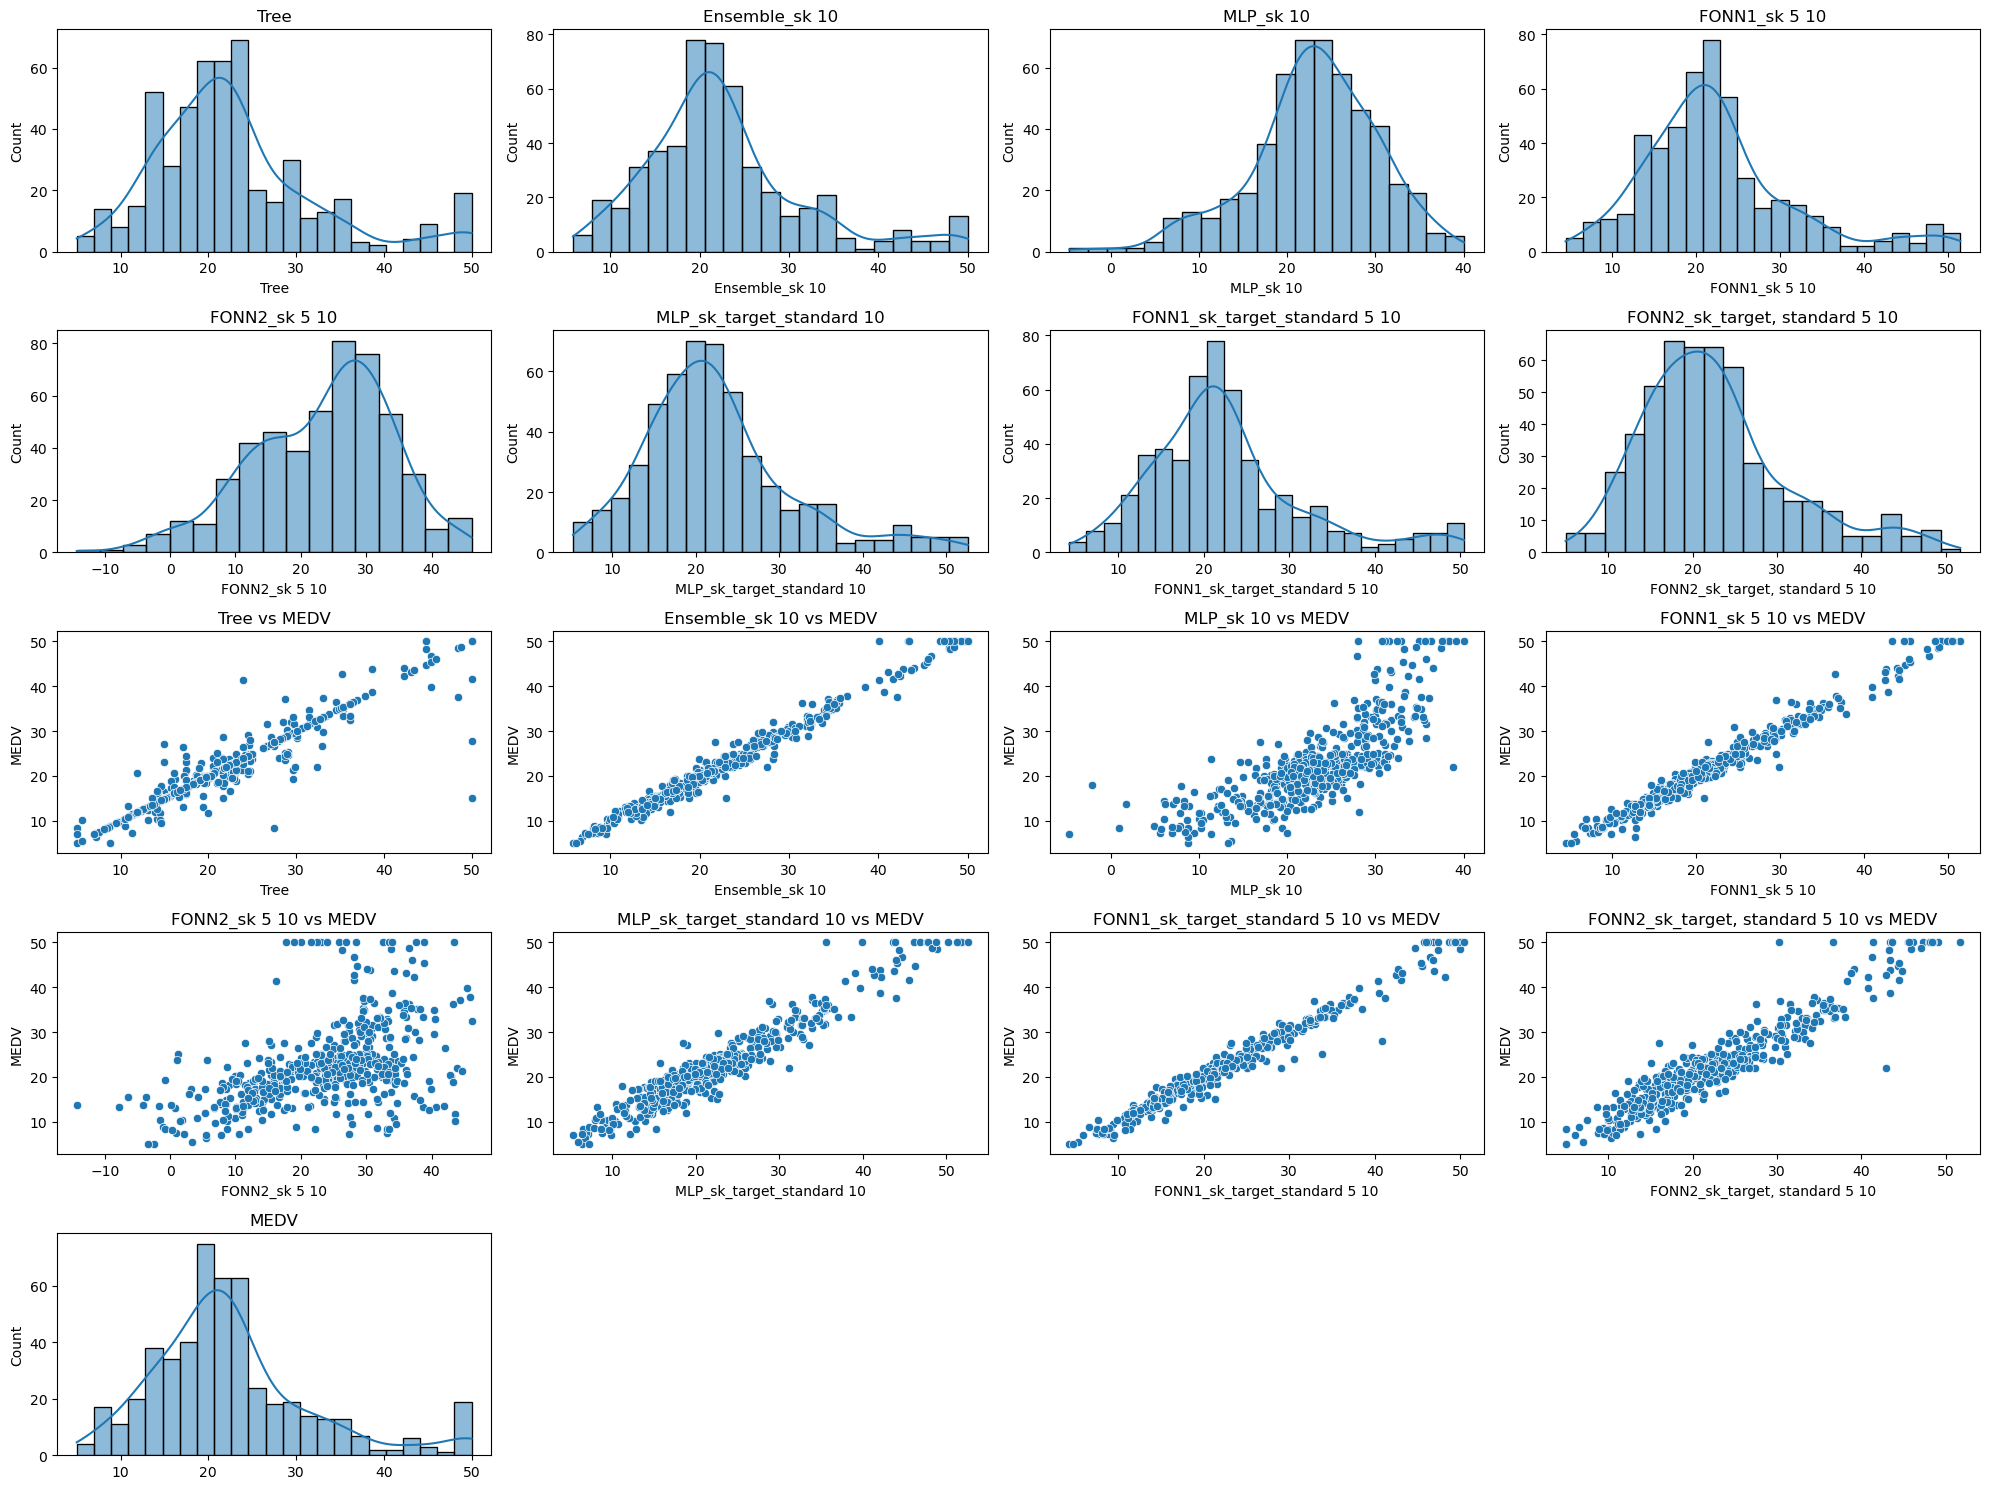

In [19]:
# Plot Predictions
plot_data(predictions, y)

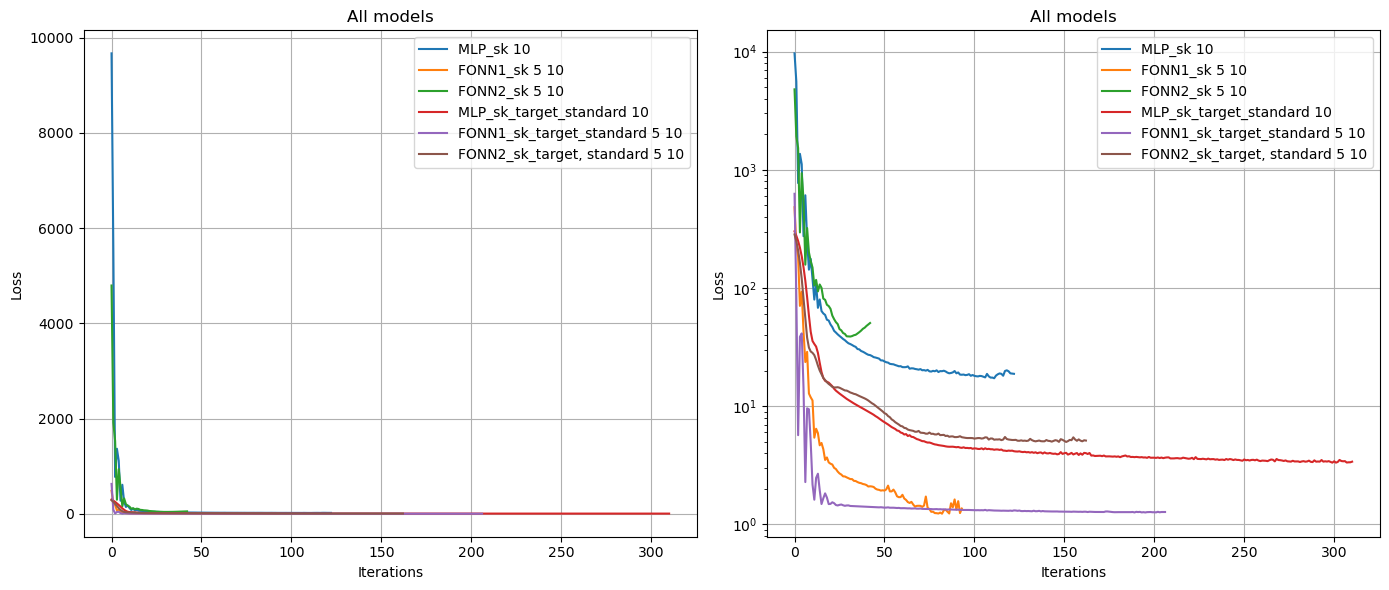

In [ ]:
# Plot all models

def plot_loss(model, ax1, ax2, label):
    ax1.plot(model.loss_curve_, label=label)
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")
    ax1.grid(True)

    ax2.plot(model.loss_curve_, label=label)
    ax2.set_yscale("log")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Loss")
    ax2.grid(True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        plot_loss(model.best_estimator_["model"], ax1, ax2, label=model_name)

ax1.set_xlabel("Iterations")
ax1.set_ylabel("Loss")
ax1.set_title("All models")
ax1.legend()
ax1.grid(True)

ax2.set_yscale("log")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss")
ax2.set_title("All models")
ax2.legend()
ax2.grid(True)

fig.tight_layout()
fig.show()

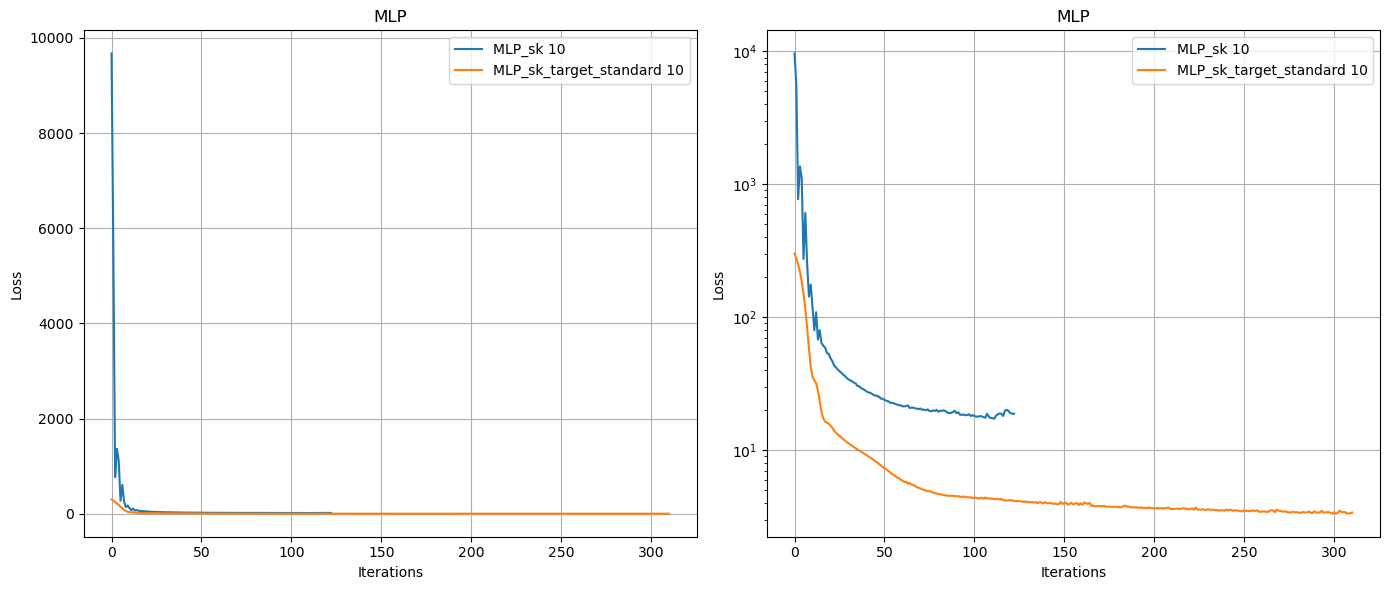

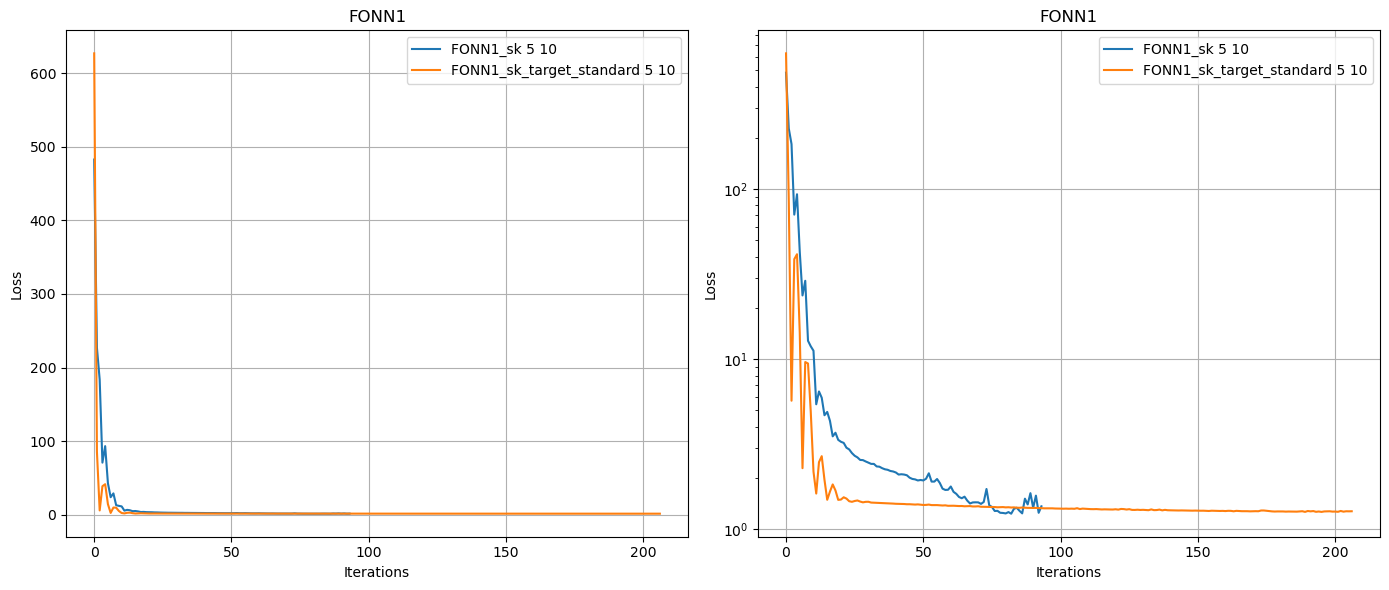

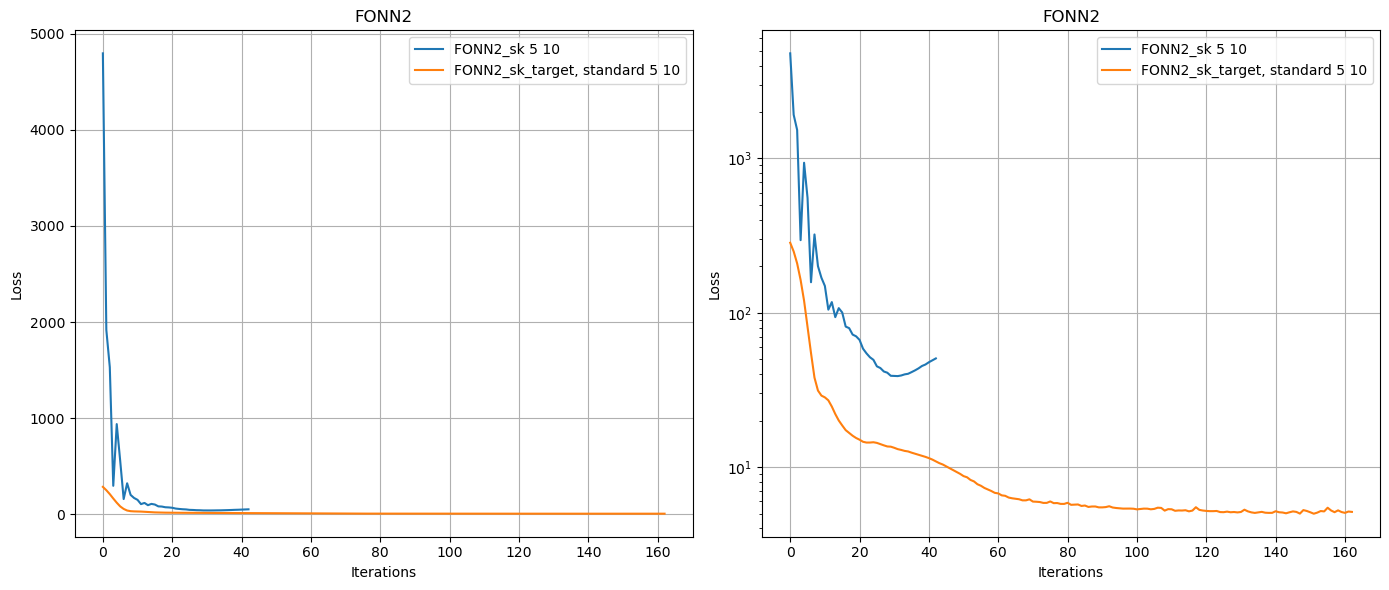

In [ ]:
# Plot model groups

plot_groups = {}
for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        key = model_name.split("_" if "_" in model_name else " ")[0]
        if key not in plot_groups:
            plot_groups[key] = plt.subplots(1, 2, figsize=(14, 6))
        fig, (ax1, ax2) = plot_groups[key]
        plot_loss(model.best_estimator_["model"], ax1, ax2, model_name)

for group, plot in plot_groups.items():
    fig, (ax1, ax2) = plot
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")
    ax1.set_title(group)
    ax1.legend()
    ax1.grid(True)

    ax2.set_yscale("log")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Loss")
    ax2.set_title(group)
    ax2.legend()
    ax2.grid(True)

    fig.tight_layout()
    fig.show()

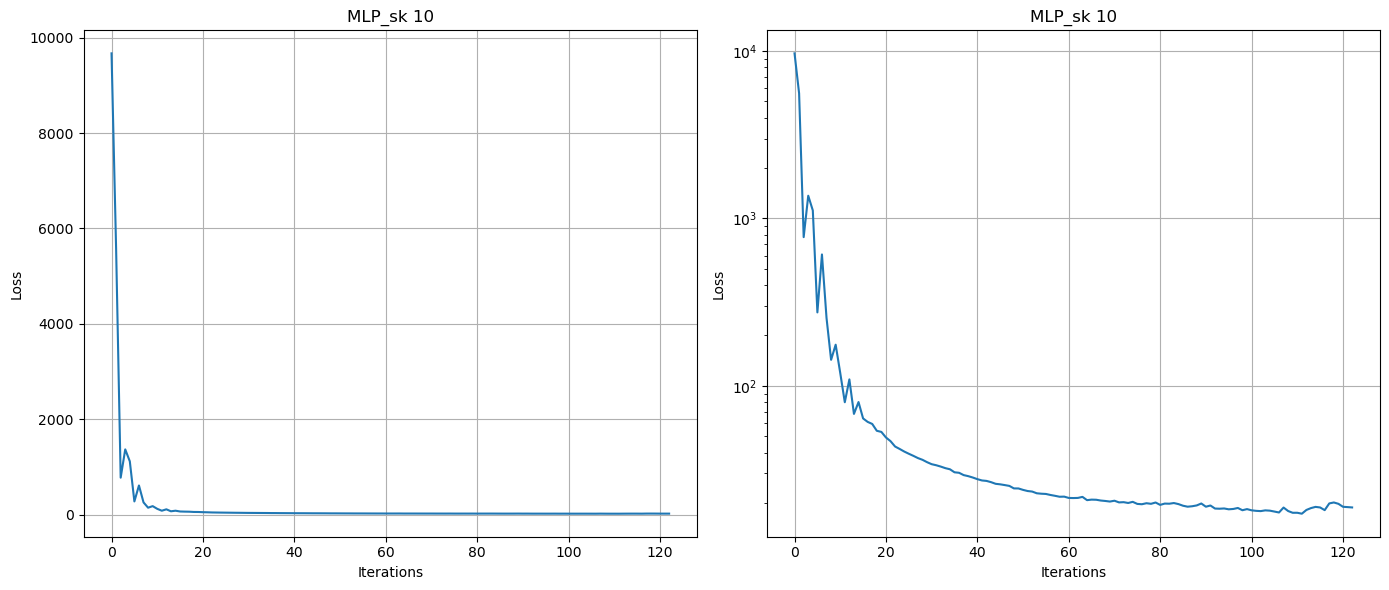

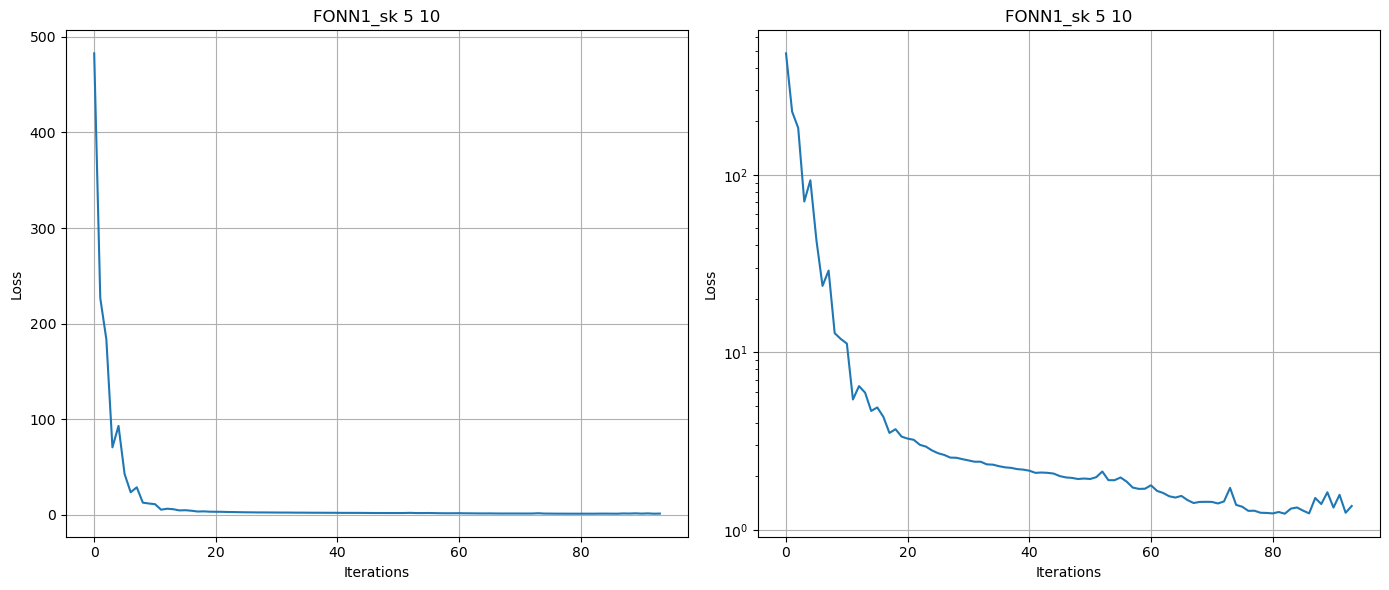

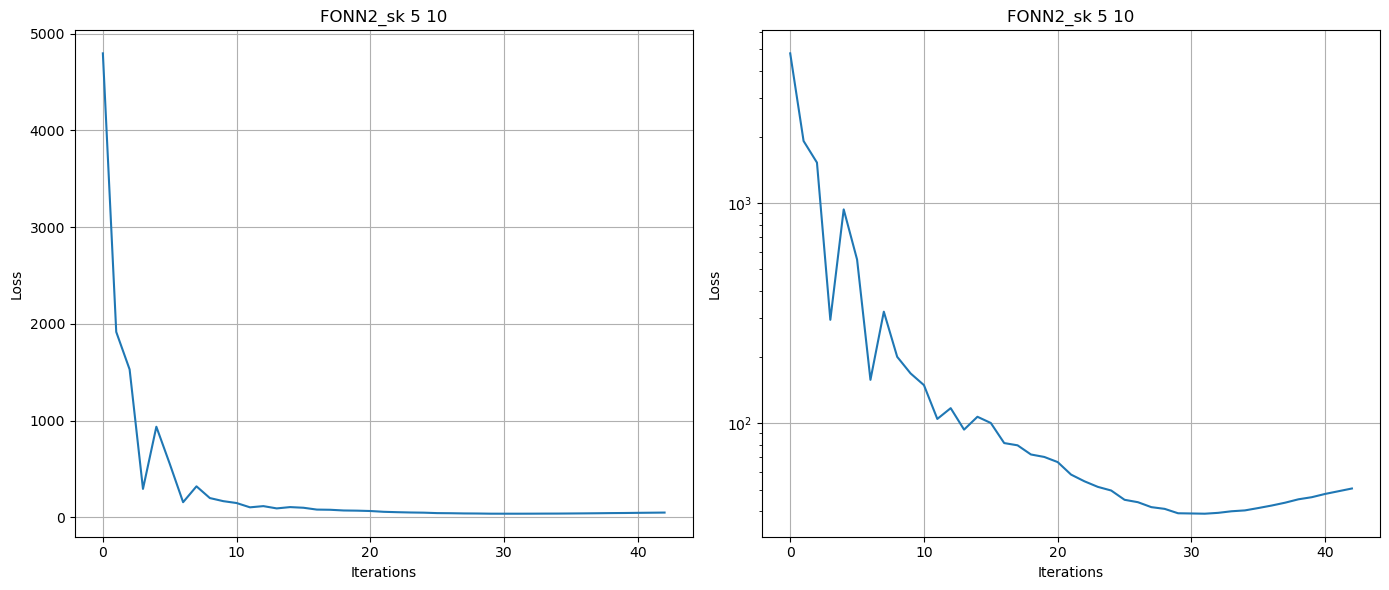

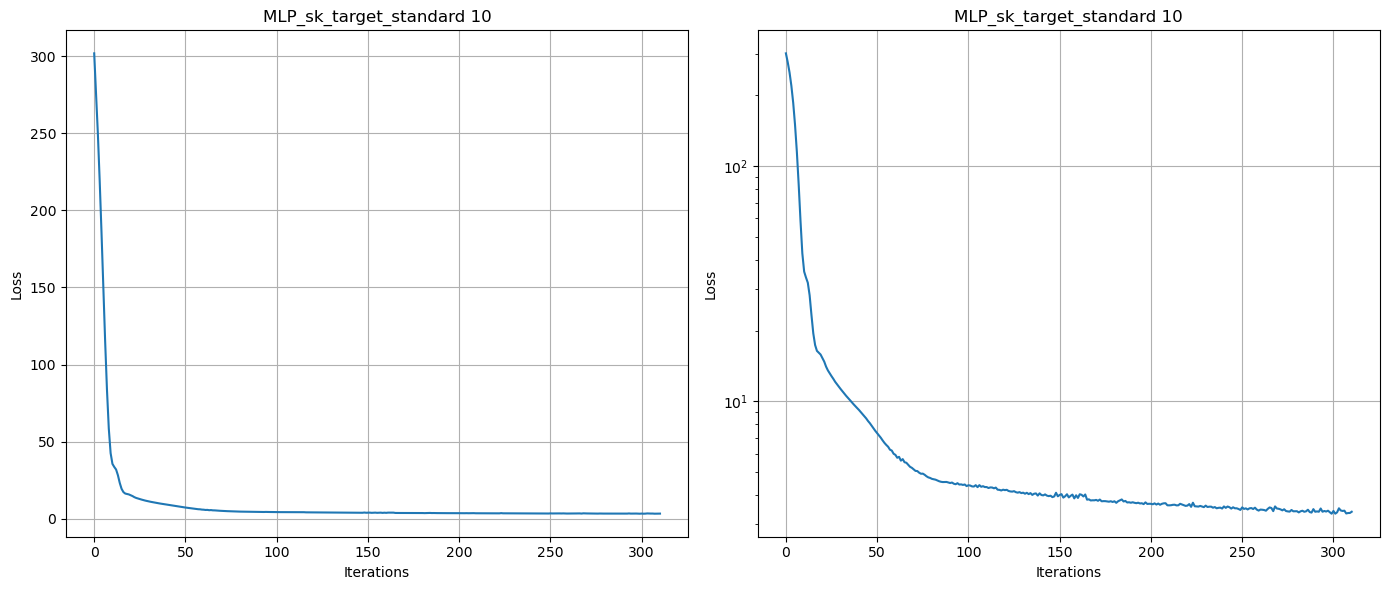

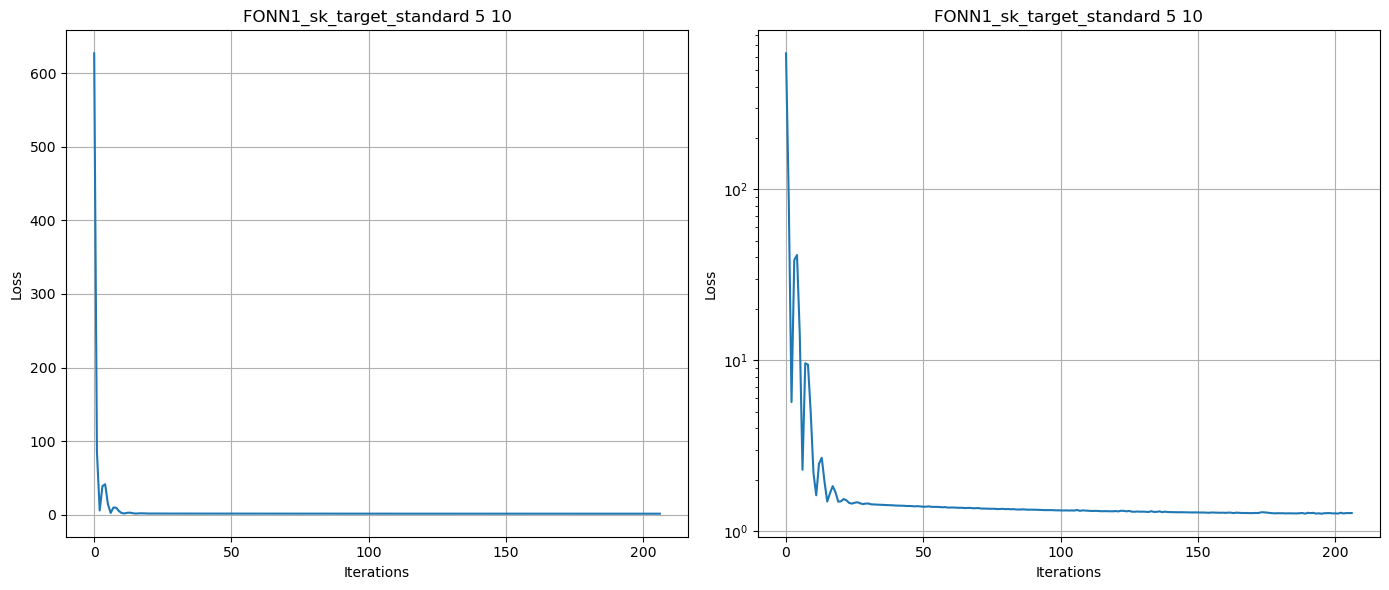

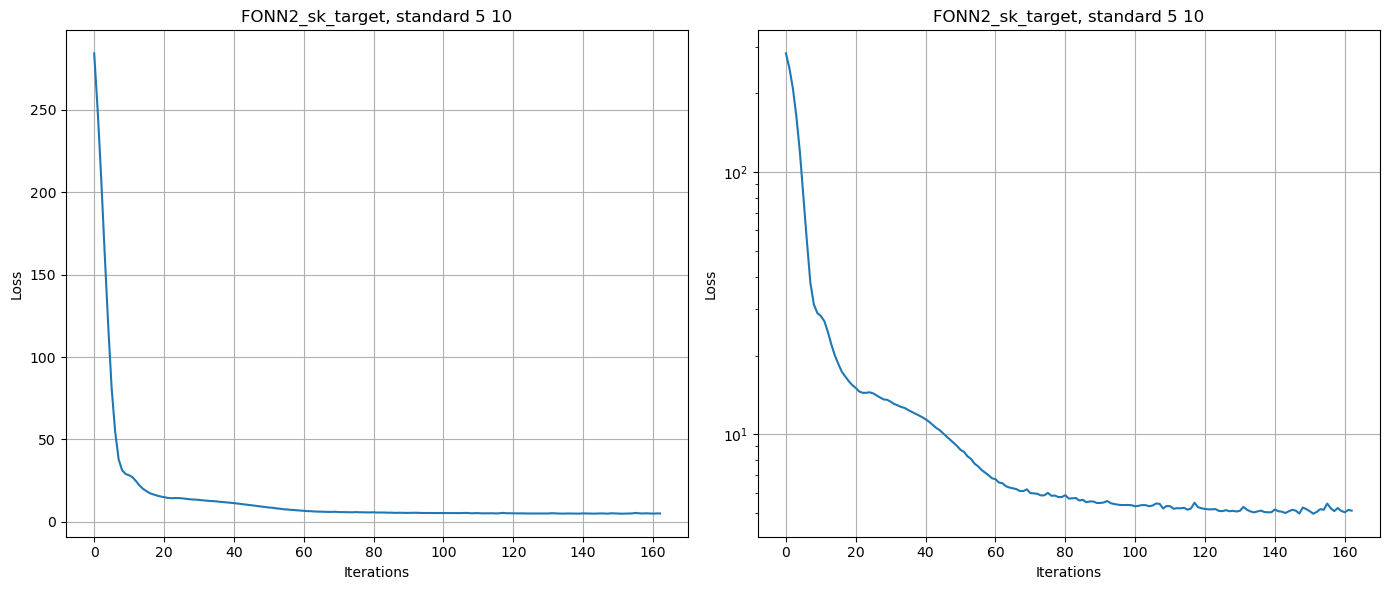

In [ ]:
# Plot individual models

for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        plot_loss(model.best_estimator_["model"], ax1, ax2, model_name)
        ax1.set_title(model_name)
        ax2.set_title(model_name)
        fig.tight_layout()
        fig.show()